In [1]:
a=[]
f=open('lianjia.csv','r', encoding='UTF-8')
for line in f:
    a.append(line.strip().split(","))
a = [n for n in a if n != [""]]  #去掉空列表
fhead=a[0]  #提取标题行
fcon=a[1:]  #除去标题行

1. **对数据进行整体分析：**

In [2]:
print("一共统计了",len(fhead),"个变量")
print("一共收录了",len(fcon),"条记录")

一共统计了 12 个变量
一共收录了 23677 条记录


2. **对price和size进一步描述：**

In [5]:
size=[float(i[fhead.index("Size")]) for i in fcon]   
price=[float(i[fhead.index("Price")]) for i in fcon]

In [3]:
def mode(dct_name):    #求众数
    dict_p={}
    for name in dct_name:
        if name in dict_p:
            dict_p[name] = dict_p[name]+1
        else: 
            dict_p[name] = 1
    #输出时list包含数字不能直接join，需要遍历'%s' %id for id in list
    return "".join('%s' %id for id in [k for (k,v) in dict_p.items() if v == max(dict_p.values())]) 

In [4]:
def median(dat):   #求中位数
    dat.sort()
    half = len(dat) // 2
    return (dat[half] + dat[~half]) / 2

In [6]:
print(" \n"+"收录的价格数据情况：")
print("最大值为",max(price),"\n最小值为",min(price),"\n均值为",sum(price)/len(price))
print("众数为",mode(price))
print("中位数为",median(price))
print(" \n"+"收录的房屋面积数据情况：")
print("最大值为",max(size),"\n最小值为",min(size),"\n均值为",sum(size)/len(size))
print("众数为",mode(size))
print("中位数为",median(size))

 
收录的价格数据情况：
最大值为 6000.0 
最小值为 60.0 
均值为 610.6683194661488
众数为 450.0
中位数为 499.0
 
收录的房屋面积数据情况：
最大值为 1019.0 
最小值为 2.0 
均值为 99.14930100941842
众数为 89.0
中位数为 88.0


3.**提出与数据相关的1至2个问题，并分析其解决思路，并给出对应的程序实现:**

* 问题1：链家哪个区域的二手房数量最多？
* 解决思路：先将区域列提取出来构造成新的列表，再利用字典统计出现次数最多的区域。

In [8]:
distr=[i[fhead.index("District")] for i in fcon]
dict_d={}   #统计各区域房源数
for name in distr:
    if name in dict_d:
        dict_d[name] = dict_d[name]+1
    else: 
        dict_d[name] = 1
print(" \n"+"房源最多的区域是","".join([k for (k,v) in dict_d.items() if v == max(dict_d.values())]))

 
房源最多的区域是 长阳


* 问题2：从时间跨度平均，链家哪个区域的二手房平均均价最大？
* 解决思路：先遍历计算出每套房的均价，使用字典统计每个区域的均价情况。

In [14]:
dict_adr={}
fhead.append("ADR")
for ite in fcon:  #增加均价列
    ite.append(float(ite[fhead.index("Price")])/float(ite[fhead.index("Size")]))
    if ite[fhead.index("District")] in dict_adr:     #在字典中加总各区域均价
        dict_adr[ite[fhead.index("District")]]=dict_adr[ite[fhead.index("District")]]+float(ite[fhead.index("ADR")])
    else:
        dict_adr[ite[fhead.index("District")]]=float(ite[fhead.index("ADR")])
        
for ite in dict_adr.keys():
    for ite2 in dict_d.keys():
        if ite==ite2 : dict_adr[ite]=dict_adr[ite]/dict_d[ite2]
print(" \n"+"均价最高的区域是","".join([k for (k,v) in dict_adr.items() if v == max(dict_adr.values())]),"，均价为",max(dict_adr.values()))

 
均价最高的区域是 丽泽 ，均价为 45.15973392502084


4.**数据可视化，显示均价最高的十个区域的均价情况：**

In [10]:
import matplotlib.pyplot as plt
dics=sorted(dict_adr.items(),key = lambda x:x[1],reverse = True)[:10]  #截取前10放入列表
mean_values = [n[1] for n in dics]
bar_labels = [n[0] for n in dics]

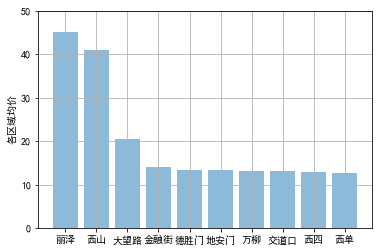

In [12]:
# 绘制图形
x_pos = list(range(len(bar_labels)))
plt.bar(x_pos, mean_values, align='center', alpha=0.5)
plt.grid()
# 设置y轴高度
max_y = max(zip(mean_values)) 
plt.ylim([0, 50])
# 设置轴标签和标题
plt.ylabel("各区域均价")
plt.xticks(x_pos, bar_labels)
plt.show()